# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2019-2020 учебный год

Лектор: Илья Щуров

Семинаристы: Соня Дымченко, Руслан Хайдуров

# Семинар 3

Сегодня мы узнаем

* Как работает метод ближайших соседей, какие у него есть параметры и на что они влияют.
* Что такое разложение ошибки на шум, смещение и разброс.
* Что такое кросс-валидация и какой она бывает.

# Метод k ближайших соседей

Метод k ближайших соседей (k nearest neighbours, k-NN) является одним из простейших алгоритмов машинного обучения. Несмотря на свою простоту, k-NN может превзойти более мощные алгоритмы и используется во множестве приложений, таких как экономическое прогнозирование, сжатие данных и генетика. Например, k-NN использовалась в [исследовании](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-7-S1-S11) по функциональной геномике в 2006 году, где гены определялись на основе их профилей экспрессии.

## Как работает k-NN?

Начнем с введения некоторых определений и обозначений.

* Пусть $x \in X$ — вектор признаков (или атрибутов) объекта. Обычно $X=\mathbb R^d$.
* Под $y$ мы будем подразумевать значение, которое мы хотим научиться предсказывать. Оно может быть числом (тогда говорят о *задаче регрессии*) или элементом конечного множества (*классом* или *меткой*, тогда говорят о *задаче классификации*). Например, предсказать выручку магазина по его месторасположению — это задача регрессии, а определить, болен человек некоторой конкретной болезнью или нет — задача классификации.

k-NN входит в число **supervised** алгоритмов или алгоритмов «обучения с учителем».
Это означает, что нам предоставляется набор данных $(x_1, y_1), \ldots, (x_n, y_n)$, в котором приведены признаки и верные ответы для $n$ каких-то объектов. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, то есть восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Для нового объекта с вектором признаков $x_{new}$ алгоритм k-NN находит $k$ ближайших к $x_{new}$ точек среди $x_1, \ldots, x_n$. Пусть они имеют индексы $i_1, \ldots, i_k$. Для задачи регрессии в качестве $h(x)$ используется среднее соответствующих значений $y$, то есть

$$h(x)=\frac{1}{k}\sum_{i=1}^k y_{i_k}.$$

Для задачи классификации в качестве $h(x)$ используется то значение $y$, которое встречается среди $y_{i_1}, \ldots, y_{i_k}$ чаще всего (если таких значений несколько, выбирается какое-то одно из них — например, самое маленькое для какого-то порядка на классах).

## Реализация k-NN вручную

Чтобы лучше понять, как работает kNN, реализуем его «вручную». Наша реализация будет довольно неэффективной — для реальной работы мы будем использовать реализацию в библиотеке scikit-learn, которая использует хитрые структуры данных для быстрого поиска ближайшего соседа. Мы же будем банально сортировать все элементы по близости к новому и выбирать k самых близких. Это дико неэффективно, но зато понятно, как работает.

In [2]:
import numpy as np

In [21]:
def kNN_regression(x_train, y_train, x_new, k=1):
    """
    x_train is np.array with shape (n, d) (matrix with n rows, d columns)
    y_train is np.array with shape (n, ) (1-dimensional array with n elements)
    x_new is np.array with shape (d,) (1-dimensional array with d elements)
    """
    pass

## Синтезированные данные
Посмотрим, как работает k-NN на примере синтезированных данных. Пусть реальная зависимость $y$ и $x$ задаётся правилом $y=x^2+\varepsilon$, где $\varepsilon$ — некоторый шум с нулевым матожиданием.

Точнее, мы будем рассматривать следующую модель:

\begin{gather}
X \sim Uniform(-1, 1);\\
\varepsilon \sim \mathcal N(0, \varepsilon_0)\\
Y = X^2 + \varepsilon,
\end{gather}

где $Uniform(-1, 1)$ — равномерное распределение на отрезке $[-1, 1]$, переменные $X$ и $\varepsilon$ независимы.

In [22]:
def f(x):
    return x ** 2

# Y | X = X^2 + \eps

def make_data(n, eps0):
    pass

Как обсуждалось на лекции, наилучшим предсказанием $y$ для данного $x$ с точки зрения минимизации ожидаемой ошибки для квадратичной функции потерь является условное матожидание $E[Y\mid X=x]$. Для нашей модели

$$E[Y\mid X=x]=x^2.$$

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

### Эффект от изменения $k$ 

Посмотрим, как работает k-NN для наших данных.

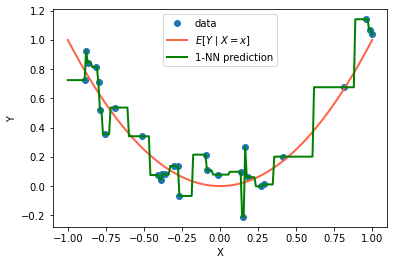

In [13]:
def plot_kNN(X, Y, k, **kwargs):
    plt.plot(X[:, 0], Y, 'o', label="data", **kwargs)
    x_grid = np.linspace(-1, 1, 200)
    plt.plot(x_grid, f(x_grid), color='tomato', lw=2, label="$E[Y\mid X=x]$")
    plt.plot(x_grid, [kNN_regression(X, Y, x_new, k) for x_new in x_grid], 
             'g-', label="{}-NN prediction".format(k), lw=2)
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
plot_kNN(X, Y, 1)

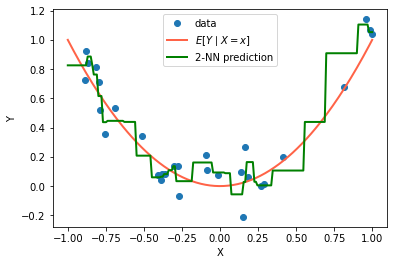

In [14]:
plot_kNN(X, Y, 2)

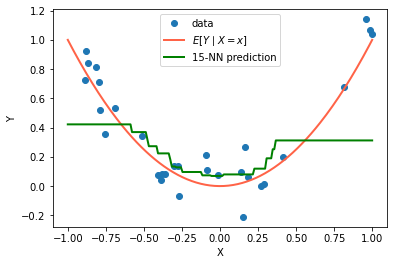

In [15]:
plot_kNN(X, Y, 15)

Что будет, если увеличить количество данных?

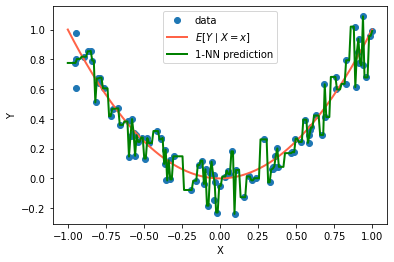

In [16]:
X, Y = make_data(100, 0.1)
plot_kNN(X, Y, 1)

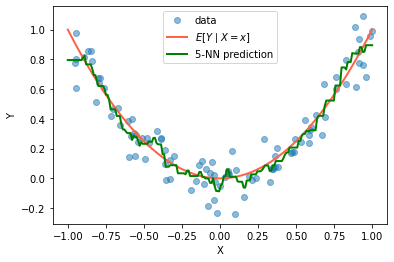

In [17]:
plot_kNN(X, Y, 5, alpha=0.5)

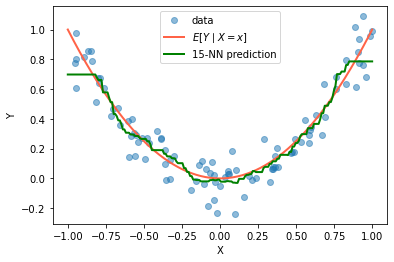

In [18]:
plot_kNN(X, Y, 15, alpha=0.5)

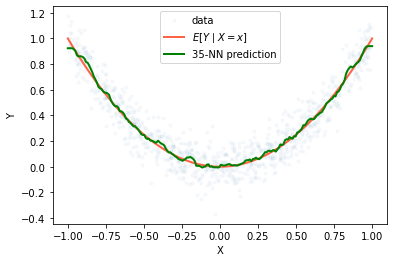

In [19]:
X, Y = make_data(1000, 0.1)
plot_kNN(X, Y, 35, markersize=3, alpha=0.03)

**Теорема**. Если $f(x)=E[Y\mid X=x]$ является непрерывной функцией от $x$, при некоторых дополнительных условиях, k-NN-регрессия стремится к $f(x)$ при $k, N \to \infty$, т.ч. $k/N\to 0$.

**Основная идея:** если данных очень много, то можно выбрать такое большое $k$, которое было бы при этом мало по сравнению с $N$. При этом $k$ ближайших соседей для точки $x_{new}$ будут лежать очень близко к ней, и, за счёт того, что $k$ большое, k-NN оценка будет достаточно близкой к истинному матожиданию $f(x_{new})$.

### Оценка EPE

In [20]:
def EPE(f, L, make_data, data_args):
    X_new, Y_new = make_data(*data_args)
    return sum(L(y_new, f(x_new)) for x_new, y_new in zip(X_new, Y_new)) / len(X_new)

### Кросс-валидация: hold-out выборка

### kNN для задачи классификации
Напишите функцию `kNN_classifier(x_train, y_train, x_new, k=1)` по аналогии с `kNN_regression`. Вместо взятие среднего нужно выбрать значение $y$, которое встречается среди $k$ ближайших соседей чаще всего. (Подсказка: оно называется *модой*.)

In [0]:
def kNN_classifier(x_train, y_train, x_new, k=1):
    # YOUR CODE HERE
    pass